# Creating a predictive NLP Model

1. Corpus Preparation  

    1.1 Importing text  
    
    1.2. Tokenizing
    
    1.3. Word Frequency
    
    1.4. Inspecting Cases

    1.5. Lemmatisation 

    1.6. Data Cleaning 

    1.7. Dropping Unique Words 

2. Creating a Model 

    2.1 Creating Tensors 

    2.2 Hardware Based Configuration 

    2.3 Model Configuration  

3. Trainging a model 

    3.1 Model testting 

4. Sentence Generation 

5. Conclusion  


### 1. Corpus Preparation



#### 1.1 Importing text

In [1]:
from urllib.request import urlopen
txt = urlopen("https://raw.githubusercontent.com/RamonMartin1/NLP_Project/master/text_tweets.txt").read().decode('utf8').split("\n")
print("Our dataset contains {} tweets".format(len(txt)))
everything = set([w for s in txt for w in s.split()])
print("and {} lexical types".format(len(everything)))

Our dataset contains 41124 tweets
and 33052 lexical types


#### 1.2. Tokenizing

Separating tweets into lexical tokens
Also applying test/train split

In [25]:

# 1. Import the tokenizer
import spacy

nlp = spacy.load("en_core_web_sm", disable=["parser","tagger","ner","textcat"])

# 2. Tokenize
txt = [nlp(s) for s in txt]

# 3. Mark the beginning and end of each script 
txt = [ ["<s>"] + [str(w) for w in s] + ["</s>"] for s in txt]

# 4. Separate the data into training and validation
train = txt[:-5]
valid = txt[-5:]

# 5. Flatten the lists into one long string and remove extra whitespace
train = [w for s in train for w in s if not w.isspace()]
valid = [w for s in valid for w in s if not w.isspace()]

In [26]:
#Checking data set size
print("Our training dataset contains {} lexical types".format(len(set(train))))
print("Our training dataset contains {} lexical tokens".format(len(train)))

Our training dataset contains 25090 lexical types
Our training dataset contains 2053200 lexical tokens


#### 1.3. Word frequency

Evaluating how frequently each word appears

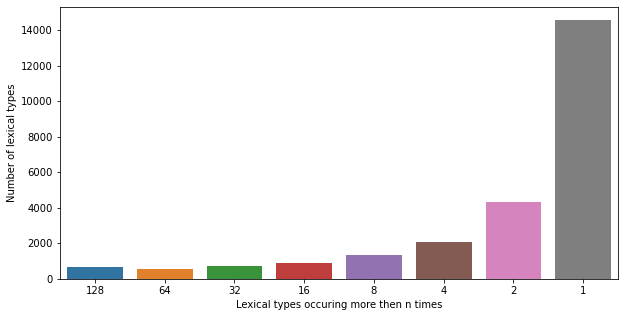

In [27]:

from collections import Counter, defaultdict
counts = Counter(train)

frequencies = [0]*8
for w in counts:
  if counts[w] >= 128:
    frequencies[0] += 1
  elif counts[w] >= 64:
    frequencies[1] += 1
  elif counts[w] >= 32:
    frequencies[2] += 1
  elif counts[w] >= 16:
    frequencies[3] += 1
  elif counts[w] >= 8:
    frequencies[4] += 1
  elif counts[w] >= 4:
    frequencies[5] += 1
  elif counts[w] >= 2:
    frequencies[6] += 1
  else:
    frequencies[7] += 1


# 2. Plot their distributions
import matplotlib.pyplot as plt
import seaborn as sns

f,a = plt.subplots(1,1,figsize=(10,5))
a.set(xlabel='Lexical types occuring more then n times', 
      ylabel='Number of lexical types')

labels = [128, 64, 32, 16, 8, 4, 2, 1]
_ = sns.barplot(labels, frequencies, ax=a, order=labels)
plt.savefig("Lexical Types1.png")

#### 1.4. Inspecting Cases

making sure unique words are actually unique 

In [28]:


from textwrap import wrap
rare = [w for w in counts if counts[w] == 1]
for line in wrap("   ".join(["{:15s}".format(w) for w in rare[:100]]), width=70):
  print(line)

content           ooafwn            wallflow          cling
barnesandnobl     igoogl            beckham           britney
nxvquo            mmjked            pinket            mvovzb
knyswt            brow              stuf              nabiscoworld
hyst              lick              sweepstak         ycsqmd
bounty            sqvqq             wahlberg          bocell
fanast            theorigin         thisthursday      connery
erv               onthursday        estef             adkin
jewlery           ckmkku            geomorpholog      landform
newyorksights     wsjnyrealestatemiddlelsmini   quattro
hollyrod          peet              mandalay          orianth
erictrumpfound    ticketl           fundraiserid      jimen
wozniack          addvks            internaton        buwwnb
abridg            ckojpn            giunt             mizrah
evanfors          minnell           brandy            includetrump
roiresearch       farewel           deerhound         htvrfq
fpkqsy         

#### 1.5. Lemmatisation 

Lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
Ex. making sure words like "time" "timing" and "timely" are considered as 1 word

In [29]:

import re
def simplify(w):
    # Remove extra punctuation
    w = w.replace("-", "").replace("~","")
    
    # Replace numbers with # sign
    w = re.sub('\d', '#', w)
    
    # Change some endings
    if len(w) > 3 and w[-2:] in set(["ed", "er","ly"]):
        return [w[:-2], w[-2:]]
    elif len(w) > 4 and w[-3:] in set(["ing","'re"]):
        return [w[:-3], w[-3:]]
    return [w]

#### 1.6. Data cleaning 

24982 lexical types
2057926 lexical tokens


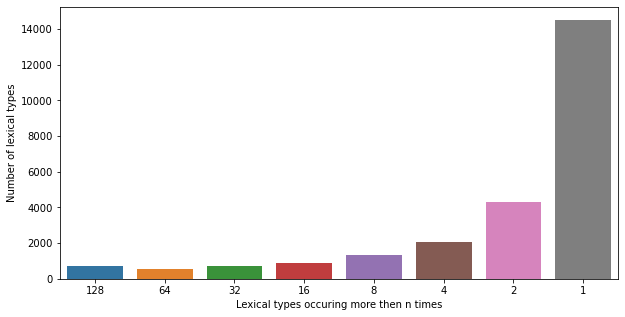

In [30]:

train_clean = []
for w in train:
    for piece in simplify(w):
        train_clean.append(piece)
valid_clean = []
for w in valid:
    for piece in simplify(w):
        valid_clean.append(piece)
        

print("{} lexical types".format(len(set(train_clean))))
print("{} lexical tokens".format(len(train_clean)))


counts = Counter(train_clean)


frequencies = [0]*8
for w in counts:
  if counts[w] >= 128:
    frequencies[0] += 1
  elif counts[w] >= 64:
    frequencies[1] += 1
  elif counts[w] >= 32:
    frequencies[2] += 1
  elif counts[w] >= 16:
    frequencies[3] += 1
  elif counts[w] >= 8:
    frequencies[4] += 1
  elif counts[w] >= 4:
    frequencies[5] += 1
  elif counts[w] >= 2:
    frequencies[6] += 1
  else:
    frequencies[7] += 1


# 2. Plot their distributions
f,a = plt.subplots(1,1,figsize=(10,5))
a.set(xlabel='Lexical types occuring more then n times', 
      ylabel='Number of lexical types')

labels = [128, 64, 32, 16, 8, 4, 2, 1]
_ = sns.barplot(labels, frequencies, ax=a, order=labels)
plt.savefig("Lexical Types2.png")

#### 1.7. Dropping unique and words 
unique words would only have 1 vector and thus cannot be used for model training

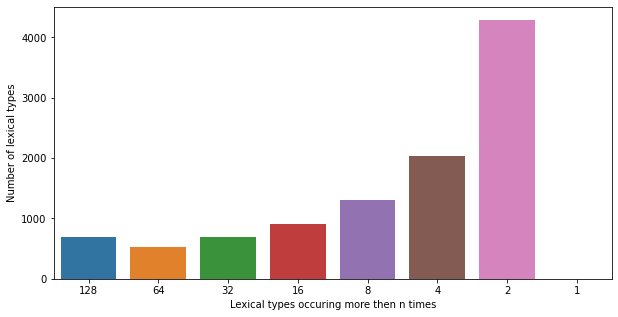

In [31]:

counts_clean = Counter(train_clean)
train_unk = [w if counts_clean[w] > 1 else "unk" for w in train_clean]
valid_unk = [w if w in counts_clean and counts_clean[w] > 1 \
               else "unk" for w in valid_clean]


counts = Counter(train_unk)

frequencies = [0]*8
for w in counts:
  if counts[w] >= 128:
    frequencies[0] += 1
  elif counts[w] >= 64:
    frequencies[1] += 1
  elif counts[w] >= 32:
    frequencies[2] += 1
  elif counts[w] >= 16:
    frequencies[3] += 1
  elif counts[w] >= 8:
    frequencies[4] += 1
  elif counts[w] >= 4:
    frequencies[5] += 1
  elif counts[w] >= 2:
    frequencies[6] += 1
  else:
    frequencies[7] += 1


# 2. Plot their distributions
f,a = plt.subplots(1,1,figsize=(10,5))
a.set(xlabel='Lexical types occuring more then n times', 
      ylabel='Number of lexical types')

labels = [128, 64, 32, 16, 8, 4, 2, 1]
_ = sns.barplot(labels, frequencies, ax=a, order=labels)
plt.savefig("Lexical Types3.png")

In [9]:
rare = [w for w in counts_clean if counts_clean[w] == 1]
rare.sort()
for line in wrap("   ".join(["{:15s}".format(w) for w in rare[-100:]]), width=70):
  print(line)

ترور              تری               تمرکز             تن
جای               جرم               جریان             جمهوریم
حركت              حقوق              حقیقت             خبرنگاران
خطاب              خواهد             خواهی             خودشان
داده              دارند             دنبال             دهيد
دوره              دوست              دولتی             رؤیاهایشان
رنج               رنجند             روشن              رژیم
ریاست             زنداني            سرکوب             سزاوار
سلاح              سمت               شاهد              شایسته
شجاع              شجاعت             شدت               عنوان
عهده              فساد              فشار              فقط
قرار              قطع               كشتار             كشته
كند               كنند              كه                ما
متحده             متوقف             مجبور             مدتهاست
مذاكره            مذاکره            مسالمت            مشاور
ملی               مهمتر             موجب              نباید
نجیب              نداردکه          

## 2. Creating a Model 


#### 2.1 Creating Tensors

In [10]:
# STEP 2.1


# Mapping words with index numbers
vocabulary = set(train_unk)
word_to_num = {}
num_to_word = {}
for num, word in enumerate(vocabulary):
  word_to_num[word] = num
  num_to_word[num] = word

# Converting dataset
import torch
train = torch.LongTensor(len(train_unk))
for i in range(len(train_unk)):
  train[i] = word_to_num[train_unk[i]]

valid = torch.LongTensor(len(valid_unk))
for i in range(len(valid_unk)):
  valid[i] = word_to_num[valid_unk[i]]

#### 2.2 Hardware Based Configuration 

In [11]:
# STEP 2.2

# Parameters
batch_size = 20   
seq_len = 35        

# choose cpu or gpu d
device = torch.device("cpu")
# Setting random seed, avoid using on laptops

# torch.manual_seed(0)
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False


def batchify(data, bsz):
    # Sivide the dataset into bsz parts.
    nbatch = data.size(0) // bsz
    # Trim off any extra elements that don't fit
    data = data.narrow(0, 0, nbatch * bsz)
    # Divide the data across batches evenly
    data = data.view(bsz, -1).t().contiguous()
    return data.to(device)

def get_batch(source, i, seq_len):
    seq_len = min(seq_len, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].view(-1)
    return data, target

def repackage_hidden(h):
    """Wraps hidden states in new Tensors, to detach them from their history."""
    if isinstance(h, torch.Tensor):
        return h.detach()
    else:
        return tuple(repackage_hidden(v) for v in h)

train = batchify(train, batch_size)
valid = batchify(valid, batch_size)


#### 2.3 Model Configuration 



In [12]:


import torch.nn as nn

class EncoderDecoder(nn.Module):
  def __init__(self):
    """
        Define all the parameters of the model
    """
    super(EncoderDecoder, self).__init__()
    # How tightly should we compress our language represenations?
    self.embed_size = 300      # How big is our word vector   
    self.hidden_size = 600     # How big is our hidden space  
    
    """ Converting words to Vectors """
    # A lookup table for translating a word into a vector
    self.embedding = nn.Embedding(len(vocabulary), self.embed_size)
    # Initialize our word vectors with a random uniform distribution
    initrange = 0.1
    self.embedding.weight.data.uniform_(-initrange, initrange)

    
    """ An RNN (LSTM) with dropout """
    self.rnn = nn.LSTM(input_size=self.embed_size, hidden_size=self.hidden_size)
    self.shrink = nn.Linear(self.hidden_size, self.embed_size)
    self.drop = nn.Dropout(p=0.5)
    
    """ Predicting words from our model """
    # We convert our vector to a set of scores over words
    self.decode = nn.Linear(self.embed_size, self.embedding.weight.size(0))
    # We use the same matrix for this ``decoding'' that we used for ``encoding''
    # https://arxiv.org/abs/1608.05859
    self.decode.weight = self.embedding.weight
    self.decode.bias.data.zero_()
   
  
  def forward(self, input, hidden=None):
    """
        Run the model
    """
    # 1. Map words to vectors
    embedded = self.embedding(input)
    # 2. Process with an RNN
    if hidden is not None:
      output, hidden = self.rnn(embedded, hidden)
    else:
      output, hidden = self.rnn(embedded)
    # 3. Apply dropout
    output = F.relu(self.shrink(self.drop(output)))
    # 4. Score the likelihood of every possible next word
    decoded = self.decode(output)
    return hidden, decoded

## 3. Training a Model 

In [13]:


import torch.nn.functional as F
def training(model, data, targets, lr, hidden):
  # Reset the model
  model.zero_grad()

  # Run the model to see its predictions and hidden states
  hidden, prediction_vector = model(data, hidden)
  prediction_vector = prediction_vector.view(-1, len(vocabulary))

  # Compare the model's predictions at each timestep to the original data
  loss = F.cross_entropy(prediction_vector, targets)
  
  # Compute gradients and perform back-propagation
  loss.backward()
  torch.nn.utils.clip_grad_norm_(model.parameters(), 0.25)
  for p in model.parameters():
      if p.grad is not None:
        p.data.add_(-lr, p.grad.data)
  
  # Return the current model loss on this data item
  return loss.item(), repackage_hidden(hidden)

#### 3.1 Model Evaluation 

In [14]:


def evaluation(model):

  model.eval()
  hidden = None
  valid_loss = 0
  for i in range(0, valid.size(0) - seq_len, seq_len):
    data, targets = get_batch(valid, i, seq_len)
    hidden, prediction_vector = model(data, hidden) 
    hidden = repackage_hidden(hidden)

    prediction_vector = prediction_vector.view(-1, len(vocabulary))
    loss = F.cross_entropy(prediction_vector, targets)
    valid_loss += loss.item() 
  return valid_loss / (valid.size(0)/seq_len)

In [15]:

import numpy as np
import time
model = EncoderDecoder().float().to(device)
prev_valid_loss = 1e100
# This scales the size of each step of backpropagation
learning_rate = 20
# This value should match the batch_size used earlier for splitting up the data
batch_size = 20

num_epochs = 10                # CHANGEME
timing = time.time()
for epoch in range(num_epochs):

  # Set the model to training mode and iterate through the dataset
  model.train()
  hidden = None
  train_loss = 0
  start_time = time.time()
  for i in range(0, train.size(0) - 1, seq_len):
    # Get the next training batch
    data, targets = get_batch(train, i, seq_len)
    
    # Run the model and perform backpropagation
    loss, hidden = training(model, data, targets, learning_rate, hidden)
    train_loss += loss

  # Evaluate how well the model predicts unseen validation data
  valid_loss = evaluation(model)

  # Check if the model's ability to generalize has gotten worse.
  # If so, slow the learning rate (shrink the step size)
  if valid_loss > prev_valid_loss:
    learning_rate /= 4.0

  # Print the training and validation performance
  train_loss /= (train.size(0)/seq_len)
  finish_time = time.time()
  print("Epoch {:2} took {:3.2f}s with train perplexity: {:7.2f}"\
        " and validation: {:7.2f}".format(epoch, finish_time - start_time, 
                                          np.exp(train_loss), 
                                          np.exp(valid_loss)))
  
  prev_valid_loss = valid_loss

total_time = (time.time() - timing)/60
print("Completed {} epochs in {:5.3f} minutes".format(num_epochs, total_time))


/Users/ramonmartin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1595629430416/work/torch/csrc/utils/python_arg_parser.cpp:766.)


Epoch  0 took 1883.49s with train perplexity:    5.93 and validation:    1.00
Epoch  1 took 951.94s with train perplexity:    4.87 and validation:    1.00
Epoch  2 took 847.65s with train perplexity:    4.58 and validation:    1.00
Epoch  3 took 851.53s with train perplexity:    4.39 and validation:    1.00
Epoch  4 took 838.21s with train perplexity:    4.24 and validation:    1.00
Epoch  5 took 842.76s with train perplexity:    4.12 and validation:    1.00
Epoch  6 took 854.79s with train perplexity:    4.01 and validation:    1.00
Epoch  7 took 890.38s with train perplexity:    3.93 and validation:    1.00
Epoch  8 took 930.76s with train perplexity:    3.87 and validation:    1.00
Epoch  9 took 944.58s with train perplexity:    3.81 and validation:    1.00
Completed 10 epochs in 163.935 minutes


## 4. Sentence generation 


In [33]:
# STEP 4.1

# What do we want the model to start the sentence with?
prefix = "<s> afraid"      #CHANGEME

# How many words do we want the model to produce?  
words_to_generate = 50   #CHANGEME

# We are only going to be looking at one example at a time
batch_size = 1

# Set the model to be in evaluation mode (no backprop!)
model.eval()

# Let's get lots of possible sentences
argmax_sent = None
argmax_prob = 0
collection = []
for item in range(100):
  # Convert our sentence start into numbers
  test = [word_to_num[word] if word in word_to_num else word_to_num["unk"] \
          for word in prefix.split()]
  probabilities = []
  
  # Run the model on the same initial input and it's own generations until
  # we reach `word_to_generate`
  for w in range(words_to_generate):
    # Run the model
    input = torch.from_numpy(np.array(test)).to(device)
    _, output = model(input.view(-1,1))
    
    # Get the prediction for the last (next) word
    last_pred = output[-1,:,:].squeeze()        
    
    # We're going to block generation of unk 
    last_pred[word_to_num["unk"]] = -100   
    
    # Do we want to sample from this distrubtion?
    if item > 0:
      # A temperature makes the distribution peakier (if < 1) or flatter if > 1
      last_pred /= 0.70   #ADVANCED_CHANGEME

      # Turn this into a distribution
      dist = torch.distributions.categorical.Categorical(logits=last_pred)
      
      # Sample
      predicted_idx = dist.sample().item()
      
    else:
      # If we aren't sampling, just take the most probable word
      _, predicted_idx = last_pred.max(0)
      predicted_idx = predicted_idx.item()

    # Save the predicted word's probability
    value = F.log_softmax(last_pred,-1)[predicted_idx].item()
    
    # Add this predicted word (index) to the list
    test.append(predicted_idx)
    # Save the probability for sorting later
    probabilities.append(value)
    
  if item > 0:
    # Add our sentence and its score to a list
    generation = (np.exp(np.sum(probabilities)), \
                       " ".join([num_to_word[w] for w in test]))
    if generation not in collection:
      collection.append(generation)
  else:
    argmax_sent = " ".join([num_to_word[w] for w in test])
    argmax_prob = np.exp(np.sum(probabilities))

# Get the best model predictions
collection.sort()
collection.reverse()
print("Argmax Generation:")
print("{:.2E}:  {}\n".format(argmax_prob,"\n\t\t".join(wrap(argmax_sent))))
print("\nSampled Generations:")
for probability, sent in collection[:10]:
  print("{:.2E}:  {}\n".format(probability, "\n\t\t".join(wrap(sent))))

Argmax Generation:
9.07E-10:  <s> afraid ' , ' mak ' , ' americ ' , ' gre ' , ' donaldjtrump ' ] "
		</s> <s> " [ ' realdonaldtrump ' , ' plea ' , ' run ' , ' presid ' , '
		nee ' , ' presid ' , ' nee '


Sampled Generations:
1.82E-07:  <s> afraid ' , ' think ' , ' lik ' , ' billionair ' ] " </s> <s> " [ '
		via ' , ' breitbartnew ' , ' donald ' , ' trump ' , ' speak ' , '
		polit ' , ' donald ' , ' trump '

2.36E-08:  <s> afraid ' , ' think ' , ' lik ' , ' billionair ' , '
		realdonaldtrump ' ] " </s> <s> " [ ' realdonaldtrump ' , ' plea ' , '
		run ' , ' presid ' , ' americ ' , ' nee ' , ' real '

1.22E-08:  <s> afraid ' , ' mak ' , ' americ ' , ' gre ' , ' donaldjtrump ' ] "
		</s> <s> " [ ' realdonaldtrump ' , ' plea ' , ' run ' , ' presid ' , '
		il ' , ' run ' , ' presid '

2.88E-10:  <s> afraid ' , ' giv ' , ' think ' , ' lik ' , ' billionair ' , ' tru
		' ] " </s> <s> " [ ' realdonaldtrump ' , ' plea ' , ' plea ' , ' plea
		' , ' run ' , ' presid '

6.22E-12:  <s> afraid ' , ' 

## 5. Conclusion 
Clearly basic regex stemming caused grammar issues. Overall much larger corpus should be used to more coherent results. Additionally using Transformer RNN instead of LSTM could also lead to much better results. 